# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

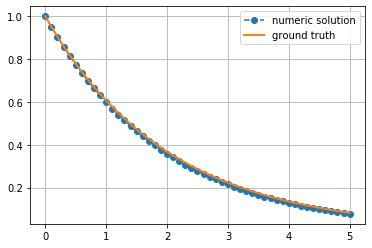

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

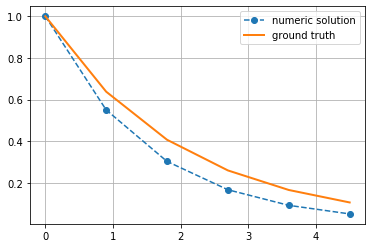

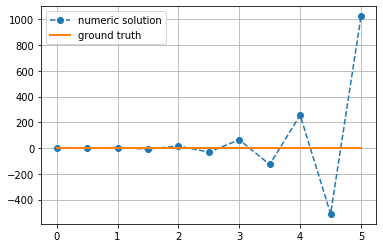

In [4]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.9)
plt.figure()
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

lam = -6
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.5)
plt.figure()
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Сначала все идет логично, при увелечении $\tau$ решения начинают лежать все дальше друг от друга, но при $|\lambda| \tau > 1$ решения начинают расходиться (в данном счлучае мы меняли $\lambda$ а не $\tau$ чтобы расхождение было нагляднее)

## II. Stiff systems.

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [5]:
def impeuler_solve(lam, u0, T, dt):
    
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt*lam*y[k])
    return tt, y

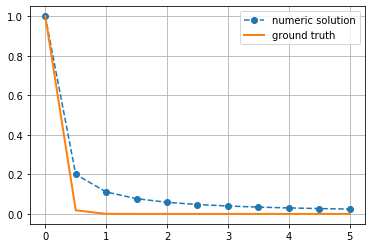

In [6]:
lam = -8
tt, y = impeuler_solve(lam, u0=1.0, T=5, dt=0.5)
plt.figure()
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Cходится всегда, ибо  $\tau$ всегда положительное, а  $\lambda$ всегда отрицательное и частное игриков всегда меньше единицы

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [7]:
def gen_euler_solve_exp(A, u0, T, dt): # реализуем наши старые алгоритмы, но теперь учитываем то, что имеем дело с матрицей
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, len(A)])
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt * A @ y[k].T
    return tt, y

def gen_euler_solve_imp(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, len(A)])
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = np.linalg.solve((np.eye(2) - dt * A), y[k])
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [8]:
u0 = np.array([1,0]).T
dt = 0.01
T = 10
A = np.array([[-10, 10], [32, -499]])
print(gen_euler_solve_exp(A, u0, T, dt)[1])
lam  = np.linalg.eigvals(A)
if max(np.abs(lam) / min(np.abs(lam))) > 10: # должно быть порядка единицы
    print( "System is stif")

[[ 1.      0.    ]
 [ 0.9     0.32  ]
 [ 0.842  -0.9888]
 ...
 [    nan     nan]
 [    nan     nan]
 [    nan     nan]]
System is stif


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in matmul
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in add
  import sys


Решение расходится. 

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [9]:
u0 = np.array([1, 0]).T
dt = 0.01
T = 10
A = np.array([[-10, 10], [32, -499]])
print(gen_euler_solve_imp(A, u0, T, dt)[1])
tt, y = gen_euler_solve_imp(A, u0, T, dt)

[[1.00000000e+00 0.00000000e+00]
 [9.13527528e-01 4.88028062e-02]
 [8.35276830e-01 5.27698484e-02]
 ...
 [1.87170085e-39 1.22320017e-40]
 [1.71171574e-39 1.11864617e-40]
 [1.56540548e-39 1.02302900e-40]]


Решение сходится. А значит неявный метод подходит больше в случае "жесткой" системы

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

In [10]:
w = 1 # задали знчение омеги
A = np.array([[0, 1], [- w**2, 0]]) # задали матрицу
n = 4
T = 10
dt = 0.01

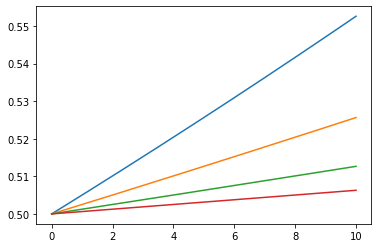

In [11]:
for i in range(n):
    tt, y = gen_euler_solve_exp(A, u0, T, dt)
    E = y[:, 1]**2 / 2 + w **2 * y[: ,0]**2 / 2 # из-за наших замен, производная - есть просто второй игрик
    plt.plot(tt, E)
    dt *= 0.5

На первый взгляд энергия не сохраняется, но чем меньше шаг, тем больше походит на то, что энергия сохраняется.

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [12]:
def runge_kuk(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([num_steps + 1, len(A)])
    y[0] = u0
    for k in range(num_steps):
        y0 = y[k] + dt * A @ y[k] / 2 # считаем вспомоательное знчение в 1/2
        y[k+1] = y[k] + dt * A @ y0 # cчитаем конечное значение
    return tt, y


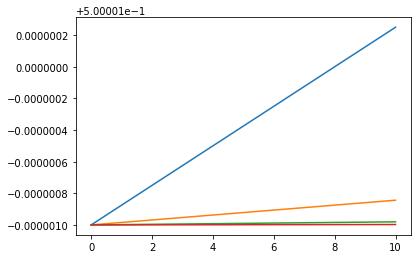

In [13]:
dt = 0.01
for i in range(n):
    tt, y = runge_kuk(A, u0, T, dt)
    E = y[:, 1]**2 / 2 + w **2 * y[: ,0]**2 / 2
    plt.plot(tt, E)
    dt *= 0.5

Энергия сохраняется большой точностью(в сравнении со схемой Эйлера) и чем меньше шаг тем лучше.